# Week 3: Working with Pandas

Welcome back! Last week we started doing some real data analysis, but we were writing extremely basic functionality by hand. While it's important to be familiar with the language and understand how things like that work, in practice you wouldn't want to have to reimplement a mean-finding function from scratch every time you're starting a new data analysis project.

Enter [Pandas](http://pandas.pydata.org/), the Python Data Analysis library. Pandas is one of the newer additions to the scientific Python ecosystem, but it's already a mature and very powerful tool. If you've worked with R before, or other statistical software, many of the concepts will be familiar to you. Pandas introduces Series (indexed lists) and DataFrames (data organized table-style into rows and columns), and provides a range of functionality built in. So let's get started!

The first thing we do is import the pandas module:

In [1]:
import pandas as pd

## Series

The basic pandas object is a Series. We can create a series from a list, like this:

In [2]:
s = pd.Series([1, 3, 5, 7, 9, 11])

Now look at the series contents:

In [3]:
s

0     1
1     3
2     5
3     7
4     9
5    11
dtype: int64

Notice the two columns above; the first, leftmost column is the index, which is just the same 0 to 5 values you'd expect in a regular list. The righthand column is the actual values the series is storing.

The Series object comes built-in with quite a few basic functions. For example:

In [4]:
print("The sum of the Series is %f." % s.sum())
print("The mean of the Series is %f." % s.mean())
print("The median of the Series is %f." % s.median())

The sum of the Series is 36.000000.
The mean of the Series is 6.000000.
The median of the Series is 6.000000.


We can perform artithmetic operations on a series; the operation will be done element by element, and the result will be another series:

In [5]:
s + 1

0     2
1     4
2     6
3     8
4    10
5    12
dtype: int64

Since the result is a new series, we can assign it to a variable:

In [6]:
double_s = s * 2
print(double_s)

0     2
1     6
2    10
3    14
4    18
5    22
dtype: int64


We can also perform arithmetic *between* series; the results will again be another series:

In [7]:
a = pd.Series([1, 2, 3])
b = pd.Series([2, 4, 8])

In [8]:
a + b

0     3
1     6
2    11
dtype: int64

In [9]:
a - b

0   -1
1   -2
2   -5
dtype: int64

In [10]:
a * b

0     2
1     8
2    24
dtype: int64

In [11]:
a / b

0    0.500
1    0.500
2    0.375
dtype: float64

We can iterate over series in much the same way as lists. 

In [12]:
for x in s:
    print(x, x*x)

1 1
3 9
5 25
7 49
9 81
11 121


We can even use list comprehension, though it gives us a list, not a Series:

In [13]:
[x*x for x in s]

[1, 9, 25, 49, 81, 121]

In [14]:
my_list = [x*x for x in s]
for i in my_list:
    print("The value of this position within my_list is %d." % i)

The value of this position within my_list is 1.
The value of this position within my_list is 9.
The value of this position within my_list is 25.
The value of this position within my_list is 49.
The value of this position within my_list is 81.
The value of this position within my_list is 121.


Let's create a series with the square of values, plus some added random 'noise'.

#### Sidebar: generating random numbers:

To get the noise, we'll use the built-in **random** module, which provides several random number generators. The most basic one, also called **random()**, simply picks a random number with uniform probability from the interval [0,1).

In [15]:
import random

In [16]:
print("The added random noise is %f" % random.random()) # Your results will obviously be different.

The added random noise is 0.103104


We can also draw a number from a [normal (Gaussian) distribution](http://en.wikipedia.org/wiki/Normal_distribution), with specified mean and standard deviations:

In [17]:
print("The random noise from a normal(Gaussian) distribution is %f." 
      % random.normalvariate(0, 1)) # Mean 0 and standard deviation 1

The random noise from a normal(Gaussian) distribution is 0.464457.


#### End sidebar

So, let's square the original series and add some random noise; we can use list comprehension, and turn the resulting list immediately into a Series:

In [18]:
s2 = pd.Series([x*x + random.normalvariate(0, 1) for x in s])
s2

0      2.025364
1     10.709535
2     24.834763
3     50.025816
4     81.267341
5    121.585509
dtype: float64

### Time series

Pandas was originally designed with financial analysis in mind, so it's no surprise that it has great time series functionality. Instead of just using the default 0, 1, 2... indices, we can index a Series on anything we want -- including datetime objects. 

First, we import the datetime module:

In [19]:
import datetime as dt

Suppose we want a monthly time-series. We first need to create a list of datetime objects representing the beginning of every month, to use as our index:

In [20]:
months = [dt.datetime(2001, x, 1) for x in range(1,13)]

In [21]:
months

[datetime.datetime(2001, 1, 1, 0, 0),
 datetime.datetime(2001, 2, 1, 0, 0),
 datetime.datetime(2001, 3, 1, 0, 0),
 datetime.datetime(2001, 4, 1, 0, 0),
 datetime.datetime(2001, 5, 1, 0, 0),
 datetime.datetime(2001, 6, 1, 0, 0),
 datetime.datetime(2001, 7, 1, 0, 0),
 datetime.datetime(2001, 8, 1, 0, 0),
 datetime.datetime(2001, 9, 1, 0, 0),
 datetime.datetime(2001, 10, 1, 0, 0),
 datetime.datetime(2001, 11, 1, 0, 0),
 datetime.datetime(2001, 12, 1, 0, 0)]

One way to create a series with a custom index is with a dictionary: keys are the index, and values are the values. Here, we create a dictionary associating each of the datetimes with a random value:

In [22]:
time_series = {}
for date in months:
    time_series[date] = random.normalvariate(0,1)

In [23]:
time_series

{datetime.datetime(2001, 1, 1, 0, 0): -0.714248589999929,
 datetime.datetime(2001, 2, 1, 0, 0): 0.37236621689487975,
 datetime.datetime(2001, 3, 1, 0, 0): 0.9222706601830576,
 datetime.datetime(2001, 4, 1, 0, 0): -2.956831527118978,
 datetime.datetime(2001, 5, 1, 0, 0): 0.523969571384623,
 datetime.datetime(2001, 6, 1, 0, 0): 0.8982912097039948,
 datetime.datetime(2001, 7, 1, 0, 0): 0.01778824947438113,
 datetime.datetime(2001, 8, 1, 0, 0): -1.1501402058870798,
 datetime.datetime(2001, 9, 1, 0, 0): -1.5405685548869432,
 datetime.datetime(2001, 10, 1, 0, 0): 0.7482709134037774,
 datetime.datetime(2001, 11, 1, 0, 0): -0.13308370218276694,
 datetime.datetime(2001, 12, 1, 0, 0): -1.454201310958689}

A lesser-known Python trick is that just like list comprehension, there is also dictionary comprehension: creating a dictionary from a known set of keys. We can simplify the above code like this:

In [24]:
time_series = {date: random.normalvariate(0,1) for date in months}
time_series

{datetime.datetime(2001, 1, 1, 0, 0): -0.967884669171017,
 datetime.datetime(2001, 2, 1, 0, 0): -0.3750017412075236,
 datetime.datetime(2001, 3, 1, 0, 0): 0.7915173682300787,
 datetime.datetime(2001, 4, 1, 0, 0): 1.2463139265724847,
 datetime.datetime(2001, 5, 1, 0, 0): 0.296699159913679,
 datetime.datetime(2001, 6, 1, 0, 0): -0.46991443936874233,
 datetime.datetime(2001, 7, 1, 0, 0): -1.3515102051199748,
 datetime.datetime(2001, 8, 1, 0, 0): 0.8503560396161021,
 datetime.datetime(2001, 9, 1, 0, 0): -1.4368170786344523,
 datetime.datetime(2001, 10, 1, 0, 0): 0.052076014179057044,
 datetime.datetime(2001, 11, 1, 0, 0): -0.8246402615340288,
 datetime.datetime(2001, 12, 1, 0, 0): -2.3391744477686256}

Now that we have a dictionary associating dates with values, we can turn it into a pandas series:

In [25]:
time_series = pd.Series(time_series)

In [26]:
time_series

2001-01-01   -0.967885
2001-02-01   -0.375002
2001-03-01    0.791517
2001-04-01    1.246314
2001-05-01    0.296699
2001-06-01   -0.469914
2001-07-01   -1.351510
2001-08-01    0.850356
2001-09-01   -1.436817
2001-10-01    0.052076
2001-11-01   -0.824640
2001-12-01   -2.339174
dtype: float64

Here's another useful bit of series functionality, that's especually handy for time series. The *cumsum()* function returns a new series, where each value is the cumulative sum of all the previous values. If we wanted to turn our random numbers into a random walk, we could do:

In [27]:
time_series_total = time_series.cumsum()

In [28]:
time_series_total

2001-01-01   -0.967885
2001-02-01   -1.342886
2001-03-01   -0.551369
2001-04-01    0.694945
2001-05-01    0.991644
2001-06-01    0.521730
2001-07-01   -0.829781
2001-08-01    0.020575
2001-09-01   -1.416242
2001-10-01   -1.364166
2001-11-01   -2.188806
2001-12-01   -4.527980
dtype: float64

If you're using the IPython Notebook, pandas can create a quick chart of the time series. If you're not using the Notebook, don't worry about it right now -- we'll go deeper into visualization (including how to do it from IDLE or the command line) next week.

If you're in the IPython notebook, use the following command to prepare for plotting:

In [29]:
%matplotlib inline 

Next, we use the pandas series' built-in *plot()* method to create the chart:

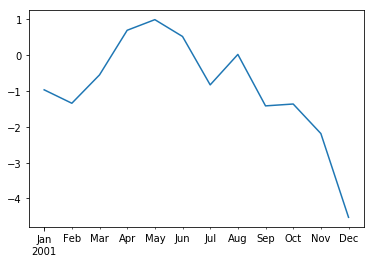

In [30]:
time_series_total.plot()

Instead of making a range of dates by hand, we can have pandas do it for us using the *date_range(...)* function, as follows:

In [31]:
dates = pd.date_range('1/1/2000', periods=120, freq='M')

In [32]:
dates

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30',
               '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31',
               '2009-11-30', '2009-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

The first date is the starting date; next, *periods* is how many dates to create. Finally, the *freq* is a code for the frequency to create the dates at. 'M' or 'm' indicates monthly; 'D' would be daily, 'min' minute-ly, and more. You can check out the  full pandas documentation for more complicated codes (e.g. quarters, business days, etc): http://pd.pydata.org/pandas-docs/stable/timeseries.html

Notice that by default, pandas puts the dates for a monthly sequence at the *end* of each month.

Let's create two new random walks:

In [33]:
ts1 = pd.Series([random.normalvariate(0,1) for x in range(120)], index=dates)
ts2 = pd.Series([random.normalvariate(0,1) for x in range(120)], index=dates)

ts1 = ts1.cumsum()
ts2 = ts2.cumsum()

We can view the first or last few entries in a series using the *head()* or *tail()* functions:

In [34]:
ts1.head() # First 5 entries

2000-01-31   -0.547450
2000-02-29    0.316264
2000-03-31    0.996419
2000-04-30    1.144099
2000-05-31   -0.295499
Freq: M, dtype: float64

In [35]:
ts2.tail() # Last 5 entries

2009-08-31   -11.501642
2009-09-30   -10.668729
2009-10-31   -11.917739
2009-11-30   -11.304854
2009-12-31   -11.372154
Freq: M, dtype: float64

Pandas series have a built-in *corr(...)* function for finding the correlation between two series:

In [36]:
print(ts1.corr(ts2)) # Defaults to Pearson correlation
print(ts1.corr(ts2, method='spearman')) # Spearman's rank correlation

-0.485686966865395
-0.43463434960761155


We can also find a series's autocorrelation:

In [37]:
ts1.autocorr()

0.9588897711461524

## Dataframes

If you've worked in R, you're already familiar with the general concept of dataframes. You probably know the same concept by different names in other languages and tools too -- it's just data organized into a table, with columns of specific variables and rows of observations. 

Technically, in Pandas, a DataFrame is a composed of Series with a shared index; each Series is a column, and each index value is a row.

We can create a DataFrame from series by creating a dictionary associating each series with a column name, like this:

In [38]:
df = pd.DataFrame({"Column1": ts1, "Column2": ts2})

In [39]:
df

,Column1,Column2
2000-01-31,-0.547450,2.075488
2000-02-29,0.316264,0.686779
2000-03-31,0.996419,-0.620098
2000-04-30,1.144099,-2.311582
2000-05-31,-0.295499,0.365232
2000-06-30,-0.432314,0.274538
2000-07-31,-0.362179,0.367496
2000-08-31,-0.246364,-1.102537
2000-09-30,1.320166,-2.097589
2000-10-31,1.540391,-1.830838


Viewing the DataFrame may either display the whole thing, or else just a quick summary of the index and the columns, depending on the version of pandas you have and how it's conigured. To view the summary, use the *.info()* method:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2000-01-31 to 2009-12-31
Freq: M
Data columns (total 2 columns):
Column1    120 non-null float64
Column2    120 non-null float64
dtypes: float64(2)
memory usage: 7.8 KB


The column headers are stored in the *columns* property:

In [41]:
df.columns

Index(['Column1', 'Column2'], dtype='object')

We can quickly see the data types of each column using the *dtypes* property:

In [42]:
df.dtypes

Column1    float64
Column2    float64
dtype: object

And we can see the index using the *index* property:

In [43]:
df.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30',
               '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31',
               '2009-11-30', '2009-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

The index is a datetime, just like it was for the series. Each row is associated with a date.

We can quickly look at the top and bottom rows using the *head()* and *tail()* methods.

In [44]:
df.head()

,Column1,Column2
2000-01-31,-0.547450,2.075488
2000-02-29,0.316264,0.686779
2000-03-31,0.996419,-0.620098
2000-04-30,1.144099,-2.311582
2000-05-31,-0.295499,0.365232


In [45]:
df.tail(2) # A number specifies how many rows to include

,Column1,Column2
2009-11-30,5.796482,-11.304854
2009-12-31,6.258111,-11.372154


Using the *corr()* method will produce a correlation table for all the columns in the DataFrame.

In [46]:
df.corr()

,Column1,Column2
Column1,1.000000,-0.485687
Column2,-0.485687,1.000000


### Selecting columns

There are two ways to access specific columns within the DataFrame. The first is by putting the columns name (in quotation marks) in square brackets:

In [47]:
df["Column1"]

2000-01-31   -0.547450
2000-02-29    0.316264
2000-03-31    0.996419
2000-04-30    1.144099
2000-05-31   -0.295499
2000-06-30   -0.432314
2000-07-31   -0.362179
2000-08-31   -0.246364
2000-09-30    1.320166
2000-10-31    1.540391
2000-11-30    1.893452
2000-12-31    1.783752
2001-01-31    1.391716
2001-02-28    0.977409
2001-03-31   -1.689082
2001-04-30   -1.833417
2001-05-31   -1.033077
2001-06-30    0.152967
2001-07-31   -0.940867
2001-08-31    0.750287
2001-09-30    0.473235
2001-10-31   -0.372541
2001-11-30    0.516258
2001-12-31   -0.165704
2002-01-31   -1.189421
2002-02-28   -3.227590
2002-03-31   -2.959155
2002-04-30   -1.832971
2002-05-31   -0.918332
2002-06-30   -1.433660
                ...   
2007-07-31    4.430136
2007-08-31    5.531669
2007-09-30    4.791837
2007-10-31    4.554428
2007-11-30    5.622988
2007-12-31    6.353424
2008-01-31    6.374975
2008-02-29    6.522393
2008-03-31    6.783767
2008-04-30    6.039049
2008-05-31    6.451009
2008-06-30    6.970202
2008-07-31 

If there are no spaces in the column name, we can also reference it as a property:

In [48]:
df.Column2

2000-01-31     2.075488
2000-02-29     0.686779
2000-03-31    -0.620098
2000-04-30    -2.311582
2000-05-31     0.365232
2000-06-30     0.274538
2000-07-31     0.367496
2000-08-31    -1.102537
2000-09-30    -2.097589
2000-10-31    -1.830838
2000-11-30    -2.263663
2000-12-31    -3.008592
2001-01-31    -1.850134
2001-02-28    -1.815748
2001-03-31    -2.157255
2001-04-30    -1.061597
2001-05-31     0.237314
2001-06-30    -0.304885
2001-07-31    -0.962365
2001-08-31    -1.310996
2001-09-30    -1.671201
2001-10-31    -1.488958
2001-11-30    -2.687348
2001-12-31    -4.744181
2002-01-31    -4.655240
2002-02-28    -3.513268
2002-03-31    -3.345178
2002-04-30    -3.189471
2002-05-31    -1.913544
2002-06-30    -1.039759
                ...    
2007-07-31    -8.791644
2007-08-31   -10.059145
2007-09-30   -10.775388
2007-10-31   -11.020333
2007-11-30   -11.682845
2007-12-31   -12.236793
2008-01-31   -12.594004
2008-02-29   -11.032018
2008-03-31   -11.444826
2008-04-30   -11.156097
2008-05-31   -11

The square bracket notation is also how we create new columns:

In [49]:
df["New Column"] = 1

In [50]:
df.head()

,Column1,Column2,New Column
2000-01-31,-0.547450,2.075488,1
2000-02-29,0.316264,0.686779,1
2000-03-31,0.996419,-0.620098,1
2000-04-30,1.144099,-2.311582,1
2000-05-31,-0.295499,0.365232,1


Notice that since there's a space in the name, we can't reference it as *df.* anything

## Working with real data

Playing with toy data is fine, but to really dive into pandas let's use it to replicate and expand on some of our analysis last week.

We can load a CSV file into a pandas DataFrame using the *read_csv(...)* function. Let's step through and try to load last week's MovieData.csv:

In [51]:
movies = pd.read_csv("MovieData.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 38, saw 2


That's a scary-looking error, but read down to the end. "Error tokenizing data" probably means that there's an issue splitting the data into columns. It turns out that *read_csv* assumes by default that the data is comma-delimited. We need to explicitly give it a separator ('sep') if it's something different, like this:

In [52]:
movies = pd.read_csv("MovieData.csv", sep='\t')

Okay, no errors now! Let's see what it's loaded:

In [53]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 6 columns):
Release_Date       3627 non-null object
Movie              3627 non-null object
Distributor        2968 non-null object
Budget             3627 non-null int64
US Gross           3627 non-null object
Worldwide Gross    3627 non-null object
dtypes: int64(1), object(5)
memory usage: 170.1+ KB


In [54]:
movies.columns

Index(['Release_Date', 'Movie', 'Distributor', 'Budget', 'US Gross',
       'Worldwide Gross'],
      dtype='object')

In [55]:
movies.dtypes

Release_Date       object
Movie              object
Distributor        object
Budget              int64
US Gross           object
Worldwide Gross    object
dtype: object

Looks pretty good, up until the end. We've got the correct column names, and a correct-seeming number of values. But we know that Budget, US Gross and Worldwide Gross are all supposed to be numbers; why is it reading them in as objects (which, in cases like this, generally means 'strings', since Pandas doesn't provide an explicit string datatype the way it does for ints and floats).

As you may remember from last week, missing values were actually filled with a text string denoting this. Helpfully, *read_csv* lets you specify one or more 'na_values' which it should read as indicating missing data. To figure out what we should include there, however, we can use the *unique()* method, which returns all the unique values of a Series:

In [56]:
movies["US Gross"].unique()

array(['66439100', '309420425', 'Unknown', ..., '48482', '1338', '181041'],
      dtype=object)

Ah, see it? It's the word 'Unknown', so let's give that as our N/A Value:

In [57]:
movies = pd.read_csv("MovieData.csv", sep='\t', na_values="Unknown")

In [58]:
movies.dtypes

Release_Date        object
Movie               object
Distributor         object
Budget               int64
US Gross           float64
Worldwide Gross     object
dtype: object

Almost there! US Gross is now a numeric column, but Worldwide Gross isn't. So let's check again:

In [59]:
movies["Worldwide Gross"].unique()

array(['254439100', '960996492', nan, ..., '71644', '240495', 'Unkno'],
      dtype=object)

It looks like at least one record has 'Unkno' as its value. Luckily, we can pass *na_values* a list of values, and it will treat all of them as indicators of no data.

(Incidentally, to make your code more readable, you can insert line-breaks inside of parentheses, and Python will treat them as the same line)

In [60]:
movies = pd.read_csv("MovieData.csv", sep='\t', 
                         na_values=["Unknown", "Unkno"])

In [61]:
movies.dtypes

Release_Date        object
Movie               object
Distributor         object
Budget               int64
US Gross           float64
Worldwide Gross    float64
dtype: object

There we go!

In [62]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
0,03/09/12,John Carter,NaN,300000000,66439100.0,254439100.0
1,05/25/07,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0
2,12/13/13,The Hobbit: There and Back Again,New Line,270000000,NaN,NaN
3,12/14/12,The Hobbit: An Unexpected Journey,New Line,270000000,NaN,NaN
4,11/24/10,Tangled,Buena Vista,260000000,200821936.0,586581936.0


Notice the 'NaN' cells -- NaN stands for Not a Number. If we want, we can replace NaN values with 0s using the *fillna(...)* method:

In [63]:
movies = movies.fillna(0)

(It probably isn't best analytic practice to assume that missing data is just zero, but we'll do it now anyway for demonstration purposes)

In [64]:
movies.tail()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
3622,05/26/06,Cavite,Truly Indie,7000,70071.0,71644.0
3623,01/01/04,The Mongol King,CustomFlix,7000,900.0,0.0
3624,04/04/99,Following,Zeitgeist,6000,48482.0,240495.0
3625,07/13/05,Return to the Land of Wonders,0,5000,1338.0,0.0
3626,08/05/05,My Date With Drew,0,1100,181041.0,0.0


Like before, though, we want to be able to actually work with the dates. We can tell pandas to parse one or more columns as dates when it loads the data, using the *parse_dates* parameter. If we assign a list of column numbers to it, it will attempt to automatically parse those columns as dates:

In [65]:
movies = pd.read_csv("MovieData.csv", sep='\t', 
                         na_values=["Unknown", "Unkno"], parse_dates=[0])

In [66]:
movies.dtypes

Release_Date       datetime64[ns]
Movie                      object
Distributor                object
Budget                      int64
US Gross                  float64
Worldwide Gross           float64
dtype: object

As you can see, the Release_Date column has been read as a datetime object. Now, to check whether it's parsed it correctly:

In [67]:
min(movies["Release_Date"])

Timestamp('1968-01-01 00:00:00')

In [68]:
max(movies.Release_Date)

Timestamp('2067-12-29 00:00:00')

So it looks like the built-in date parser isn't very good at figuring out which dates are in the 20th century, and which are in the 21st. Fortunately, we already solved this problem last week; we can bring in our custom parser, and tell Pandas to use that, using the *date_parser* parameter.

In [69]:
def make_date(date_str):
    '''
    Turn a MM/DD/YY string into a datetime object
    '''
    m, d, y = date_str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y, m, d)

In [70]:
movies = pd.read_csv("MovieData.csv", sep='\t', na_values=["Unknown", "Unkno"], 
                         parse_dates=[0], date_parser=make_date)

Notice that we're only passing the name of the function, without the usual parentheses. Conceptually, think of this as simply passing the name of our parser function, which the *read_csv(...)* function can call on its own. For each entry, pandas will automatically call the function, and put its return value in the column. (More technically, functions in Python are first-class objects, and can be passed as arguments just like any other data type).

In [71]:
movies = movies.fillna(0)

In [72]:
print(movies.Release_Date.max())
print(movies.Release_Date.min())

2013-12-13 00:00:00
1915-02-08 00:00:00


There, that's better.

I mentioned earlier that we can easily create columns from other columns. Now that we have data, let's look at it again:

In [73]:
movies["Non_US_Gross"] = movies["Worldwide Gross"] - movies["US Gross"]

For each movie, the value of the "Non_US_Gross" will be its Worldwide Gross minus its US Gross. The underscore in the name aren't mandatory, but they let us reference the column like this:

In [74]:
movies.Non_US_Gross.min()

-184925485.0

As you see above, *min()* (and *max()* as well) are built-in series functions, which can be called for columns as well. However, the Non-US Gross shouldn't be negative, since the Worldwide Gross is supposed to be inclusive of US Gross. So we want to take a closer look at those rows to figure out what's going on.

## Subsetting

Just because we have one big dataset doesn't mean we want to work with it all at once. Often --- like right now -- we want to be able to select only a subset of the data. In pandas, we do this by putting the condition we're selecting on in square brackets. For example, if we want only movies where the Non-US Gross is negative, we do:

In [75]:
movies[movies.Non_US_Gross < 0]

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Non_US_Gross
272,1998-11-13,Meet Joe Black,Universal,85000000,44650003.0,0.0,-44650003.0
274,2000-11-22,102 Dalmatians,Buena Vista,85000000,66941559.0,0.0,-66941559.0
280,2012-03-30,Mirror Mirror,0,85000000,19662216.0,0.0,-19662216.0
313,2000-01-01,Fantasia 2000 (IMAX),Buena Vista,80000000,60507228.0,0.0,-60507228.0
321,2000-06-16,Fantasia 2000 (Theatrical Release),Buena Vista,80000000,9103630.0,0.0,-9103630.0
324,1998-12-25,Mighty Joe Young,Buena Vista,80000000,50632037.0,0.0,-50632037.0
339,1997-12-25,The Postman,Warner Bros.,80000000,17650704.0,0.0,-17650704.0
384,1999-07-23,Inspector Gadget,Buena Vista,75000000,97387965.0,0.0,-97387965.0
390,1999-12-17,Anna and the King,20th Century Fox,75000000,39251128.0,0.0,-39251128.0
397,1998-10-23,Soldier,Warner Bros.,75000000,14623082.0,0.0,-14623082.0


It looks like in all these cases, the Non-US Gross is negative because Worldwide Gross is zero. Remember that we replaced missing values with zeroes, which is probably where these come from. Let's double-check this by looking at the max or min values of Non-US Gross when the Worldwide Gross column is zero. As the output above hints, the results of square bracket notation can be treated just like a DataFrame -- which means we can select columns, and it will only return the column values that are within our subset.

In [76]:
movies[movies["Worldwide Gross"]==0]["Non_US_Gross"].max()

0.0

Since Worldwide Gross is supposed to be inclusive of US Gross, a sensible thing to do is to just fill these values with those of their respective US Gross. To do this, we use the subset notation again, but this time with an assignment. Note that for assignments, we put the column first, then the subset.

In [77]:
movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["US Gross"]

C:\Users\jenkij\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


You may see a warning -- similar to the one I got above. It's telling you that it can't tell whether you're operating on a copy of part of the DataFrame, or a subset. Usually you can just ignore this warning, and just make sure that the data copied the way you wanted it to:

In [78]:
movies[movies.Non_US_Gross < 0]

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Non_US_Gross
272,1998-11-13,Meet Joe Black,Universal,85000000,44650003.0,44650003.0,-44650003.0
274,2000-11-22,102 Dalmatians,Buena Vista,85000000,66941559.0,66941559.0,-66941559.0
280,2012-03-30,Mirror Mirror,0,85000000,19662216.0,19662216.0,-19662216.0
313,2000-01-01,Fantasia 2000 (IMAX),Buena Vista,80000000,60507228.0,60507228.0,-60507228.0
321,2000-06-16,Fantasia 2000 (Theatrical Release),Buena Vista,80000000,9103630.0,9103630.0,-9103630.0
324,1998-12-25,Mighty Joe Young,Buena Vista,80000000,50632037.0,50632037.0,-50632037.0
339,1997-12-25,The Postman,Warner Bros.,80000000,17650704.0,17650704.0,-17650704.0
384,1999-07-23,Inspector Gadget,Buena Vista,75000000,97387965.0,97387965.0,-97387965.0
390,1999-12-17,Anna and the King,20th Century Fox,75000000,39251128.0,39251128.0,-39251128.0
397,1998-10-23,Soldier,Warner Bros.,75000000,14623082.0,14623082.0,-14623082.0


Looks good (though we need to update the Non_US_Gross column). Notice that even though we didn't subset the US Gross column as we assigned it, pandas automatically matched up the correct rows.

In [ ]:
movies["Non_US_Gross"] = movies["Worldwide Gross"] - movies["US Gross"]

In [ ]:
movies.Non_US_Gross.min()

With that correction in hand, we can continue analyzing the data. For example, let's get the profit for each movie:

In [ ]:
movies["Profits"] = movies["Worldwide Gross"] - movies["Budget"]

There are a few standard metrics we want to compute frequently, such as min, max, mean and median. Pandas puts all these handily together with the *describe()* method:

In [ ]:
movies.Profits.describe()

Note that pandas tries to pick the way to display numbers. Here, for example, it decides to use [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation), expressing numbers as multiples of exponents of 10.

Column names are just Python values like anything else, and DataFrame.columns works basically like a list. That means that we can loop over it. For example, suppose we wanted to print the number of unique values in each column:

In [ ]:
for column in movies.columns:
    print(column, len(movies[column].unique()))

## Grouping

Often, what you care about aren't individual records, but summaries aggregated at some level. For example, you may want to know how many movies were released each year, or whether certain months of the year have more earthquakes than others. 

Pandas uses the Split-Apply-Combine paradigm; we **split** the data into groups, **apply** a certain calculation to each group separately, and **combine** the results back into a new data structure. 

Let's start by getting the annual mean of each numeric column: finding the average US Gross, Worldwide Gross, etc. by year.

First, we need to create a new column to aggregate on -- the Release Year. Since the values of the *Release_Date* column are datetime-like objects, they have a *year* property:

In [ ]:
movies.Release_Date[19].year # Some arbitrary row

To create a new column based on another column, with an operation that isn't basic arithmetic, we use the *apply(...)* method. This method takes another function as an input, and applies it (hence the name) to each value in a column or series. The function being applied should take a single value as an input, and produce a similar output which can be assigned to the new series.

In [ ]:
def get_year(date):
    return date.year

In [ ]:
movies["Year"] = movies.Release_Date.apply(get_year)

In fact, we don't even have to define an entire function; Python allows us to use the **lambda** keyword to create a simple one-line function directly inside the *apply(...)* parentheses (you may have encountered this concept as anonymous functions in other languages). 

We could simplify the lines above to:

In [ ]:
movies["Year"] = movies.Release_Date.apply(lambda x: x.year)

In [ ]:
print(movies.Year.min())
print(movies.Year.max())

Now that we've created a Year column, we need to divide the data by its different values. We go this using the DataFrame's *groupby(...)* method, like this:

In [ ]:
by_year = movies.groupby('Year')

The argument we give *groupby(...)* is the name of the column to group by. The result of the method, which is assigned here to *by_year* is a special pandas object that stores a grouped dataframe. The groups themselves are stored as a dictionary, associating group labels (e.g. years, in this case) with the indices of all the rows that belong to that group.

In [ ]:
print(by_year.groups.keys())

In [ ]:
by_year.groups[1916]

 We can carry out operations on the grouped object to yield aggragated DataFrames. 

The simplest of the operations built-in to the grouped data object is *mean()*, which simply returns the mean of each column for each of the groups -- in this case, the mean of each column by year. The result is a new DataFrame, indexed by year:

In [ ]:
annual_means = by_year.mean()

In [ ]:
annual_means.info()

In [ ]:
annual_means.head()

We can apply our own functions to each group as well, by passing them to the group object's *aggregate(...)* method. For example, if we want a count of how many movies were released in each year, we could simply pass Python's built-in *len* function, to count the length of each group:

In [ ]:
counts = by_year.aggregate(len)

In [ ]:
counts.head()

In [ ]:
counts.info()

Notice how all the columns (except the first one) in each row have the same value --  we're just counting the number of rows per group (movies per year, in this case), which won't vary from column to column. (The Release_Date column 'remembers' that it's holding a date, and converts the count number accordingly).

In fact, there's no need for a whole data frame: the count of movies per year is just a series. If we only want a single series, we can select a column from the grouped object just like from a DataFrame. For the movie counts, it doesn't matter which column we pick (with the exception of the Release_Date column). 

In [ ]:
counts = by_year.Movie.aggregate(len)

In [ ]:
counts

As you can see, *counts* is now a series storing the count of movies released per year.

## Merging

You'll frequently find yourself working with more than one dataset at a time, or needing to combine data from several sources for analysis. Fortunately, pandas makes this simple as well.

For this example, suppose we're interested in how movies are affected by the state of the American economy. First, let's put together three series: the number of movies released per year, their average budget, and their average profit.

The latter two come from the *annual_means* DataFrame. We can create a DataFrame by subsetting a list of columns from another DataFrame, like this:

In [ ]:
annual_data = annual_means[["Budget", "Profits"]]

In [ ]:
annual_data.info()

To make it clear that we're looking at averages now, we may want to rename the columns. We do this using the *rename* method, and passing a dictionary to the *columns* argument, associating the old names and new names for columns we want to rename:

In [ ]:
annual_data = annual_data.rename(columns={"Budget": "Mean_Budget", "Profits": "Mean_Profit"})

Now we want to add the movie count. In this case, we can simply assign it like this:

In [ ]:
annual_data["Count"] = counts

In [ ]:
annual_data.head()

In [ ]:
annual_data.tail()

Since *counts* and *annual_data* have overlapping index values, pandas automatically knows how to merge them.

Next, let's load an additional dataset to merge in.  We'll load a simple time series with annual unemployment rates. After loading the dataset above, this is a piece of cake:

In [ ]:
unemp = pd.read_csv("Unemployment.csv")

In [ ]:
unemp

In [ ]:
unemp.dtypes

In [ ]:
print(unemp.Year.min())
print(unemp.Year.max())

It's been loaded as a DataFrame, with two columns: Year and Unemployment. Note that Year isn't an index, just a regular column. Our goal now is to bring the *Unemployment* column into the *annual_data* frame:

In [ ]:
data_merged = annual_data.merge(unemp, how='left', left_index=True, right_on="Year")

In [ ]:
data_merged.head()

In [ ]:
data_merged.tail()

Let's take a closer look at what happened here. The *merge(...)* method of a DataFrame is used to merge that DataFrame (known by convention as the left-hand DataFrame) with another one (the right-hand DataFrame), provided as the first argument. DataFrames are merged by finding rows that match on some criteria, and combining them. We provide the criteria in in the *left_* or *right_* *index=* or  *on=* arguments. In the example above, we're saying to merge rows where the left-hand index matches right-hand *Year* column. 

The *how=* argument is the type of join to use, a concept you may be familiar with from SQL. There are three types of joins:

* *left-join* means keep all the rows from the left-hand dataset, and merge in any matching right-hand rows.
* *right-join* means keep all the rows from the right-hand dataset, and merge in any matching left-hand rows.
* *inner-join* means keep and merge only rows where there's a match between the left- and right-hand datasets.

In this case, the indices on the right-hand dataset are a subset of the left-hand indices, so a right and an inner join are equivalent. Let's quickly see what those results would look like:

In [ ]:
temp = annual_data.merge(unemp, how='right', left_index=True, right_on="Year")

In [ ]:
temp.head()

In [ ]:
temp.tail()

Notice that the *merge(...)* method returns a new DataFrame, without modifying the original DataFrame. Notice also that the resulting DataFrame has a different index; whereas previously the left-hand DataFrame was indexed on Year, the merged DataFrame has a simple row-count index, with Year now an ordinary column.

If we want to, we can set the *Year* column as the index, using the *set_index(...)* method:

In [ ]:
data_merged = data_merged.set_index("Year")

In [ ]:
data_merged.head()

Notice that we're assigning the result of  *set_index(...)* to the *data_merged* DataFrame itself -- again, by default it returns a new DataFrame, without modifying the original one. With most methods, instead of assigning the new DataFrame to the old name, we can use the *inplace* argument, like this:

In [ ]:
# Reset the index, and make the old index 
data_merged.reset_index(inplace=True) 

In [ ]:
data_merged.head()

In [ ]:
data_merged.set_index("Year", inplace=True)

In [ ]:
data_merged.head()

Now that we have our data together, we could see whether there are any annual correlations in our data:

In [ ]:
data_merged.corr()

It looks like unemployment doesn't correlate at all with the number of movies released, but does correlate weakly with their average budget and profit.